# Agenda

1. Sorting
2. Strings and series
3. Plotting 
4. Data frames
     - Defining
     - Reading data from files into them
     - Sorting
     - Grouping
     - Pivot tables
     - Plotting

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%matplotlib inline

In [5]:
np.random.seed(0)
s = Series(np.random.randint(0, 100, 10),
          index=list('fhiabjcgde'))
s

f    44
h    47
i    64
a    67
b    67
j     9
c    83
g    21
d    36
e    87
dtype: int64

In [6]:
# how can I sort these?

# in Python, the sorted() function uses "TimSort"

# we can sort a series by its index (sort_index), or by its values (sort_values)

In [7]:
help(s.sort_index)

Help on method sort_index in module pandas.core.series:

sort_index(axis=0, level=None, ascending: 'bool | int | Sequence[bool | int]' = True, inplace: 'bool' = False, kind: 'str' = 'quicksort', na_position: 'str' = 'last', sort_remaining: 'bool' = True, ignore_index: 'bool' = False, key: 'IndexKeyFunc' = None) method of pandas.core.series.Series instance
    Sort Series by index labels.
    
    Returns a new Series sorted by label if `inplace` argument is
    ``False``, otherwise updates the original series and returns None.
    
    Parameters
    ----------
    axis : int, default 0
        Axis to direct sorting. This can only be 0 for Series.
    level : int, optional
        If not None, sort on values in specified index level(s).
    ascending : bool or list-like of bools, default True
        Sort ascending vs. descending. When the index is a MultiIndex the
        sort direction can be controlled for each level individually.
    inplace : bool, default False
        If True, 

In [8]:
s.sort_index()

a    67
b    67
c    83
d    36
e    87
f    44
g    21
h    47
i    64
j     9
dtype: int64

In [9]:
s.sort_values()

j     9
g    21
d    36
f    44
h    47
i    64
a    67
b    67
c    83
e    87
dtype: int64

# Strings

In [10]:
a = np.array('this is a test'.split())
a

array(['this', 'is', 'a', 'test'], dtype='<U4')

In [11]:
s = Series('this is a test'.split())
s

0    this
1      is
2       a
3    test
dtype: object

In [12]:
pd.NA

<NA>

In [13]:
pd.StringDtype

pandas.core.arrays.string_.StringDtype

In [14]:
s

0    this
1      is
2       a
3    test
dtype: object

In [16]:
# I want to know how long each string (element) is in s

# option 1: for loop.  DO NOT DO THIS!
sum([len(one_word)
for one_word in s])

11

In [17]:
# option 2: use the str accessor in Pandas
# meaning: Each series has a .str attribute.  Via that attribute, we can invoke many methods 

s.str.len()   # this invokes "len" on each element of s, returning a new series

0    4
1    2
2    1
3    4
dtype: int64

In [18]:
# what is the total length of characters in all of our words?
# s.str.len() returned a series

s.str.len().sum()   # calculate the lengths, then sum them up

11

In [19]:
s.str.isdigit()  # this returns True if all characters in a string are digits (0-9)

0    False
1    False
2    False
3    False
dtype: bool

In [20]:
s.str.contains('e')   # which words contain the character 'e'?

0    False
1    False
2    False
3     True
dtype: bool

In [21]:
# str.contains supports regular expressions!  
# https://RegexpCrashCourse.com/

# Exercise: Strings in series

1. Create a series with 10 strings (words). Try to have them vary in length.
2. Find all of the words whose lengths are < the mean word length.
3. Find all the words that contain both 'a' and 'e'.  (It might be empty!)


In [22]:
s = Series('this is a very exciting and interesting example series is it not'.split())
s

0            this
1              is
2               a
3            very
4        exciting
5             and
6     interesting
7         example
8          series
9              is
10             it
11            not
dtype: object

In [23]:
s.str.len()

0      4
1      2
2      1
3      4
4      8
5      3
6     11
7      7
8      6
9      2
10     2
11     3
dtype: int64

In [26]:
s[s.str.len() < s.str.len().mean()]

0     this
1       is
2        a
3     very
5      and
9       is
10      it
11     not
dtype: object

In [29]:
# find words that contain both 'a' and 'e'
s[s.str.contains('a') & s.str.contains('e')]

7    example
dtype: object

In [32]:
# how often does each word length appear in my series?
# we can use "value_counts", a method that runs on a series

# the result of value_counts is a series s:
# - the index to the series contains the unique values from s
# - the values in the series contain the (sorted, descending order) count for each value in s
s.str.len().value_counts()

2     3
4     2
3     2
1     1
8     1
11    1
7     1
6     1
dtype: int64

In [33]:
s.str.len().value_counts(normalize=True)   # return percentages, not numbers

2     0.250000
4     0.166667
3     0.166667
1     0.083333
8     0.083333
11    0.083333
7     0.083333
6     0.083333
dtype: float64

In [34]:
s = Series(['apple', 'apple', 'banana', 'apple', 'banana', 'apple', 'cherry', 'cherry', 'banana'])
s

0     apple
1     apple
2    banana
3     apple
4    banana
5     apple
6    cherry
7    cherry
8    banana
dtype: object

In [35]:
s.value_counts()

apple     4
banana    3
cherry    2
dtype: int64

In [36]:
s.unique()

array(['apple', 'banana', 'cherry'], dtype=object)

# Plotting

<AxesSubplot:>

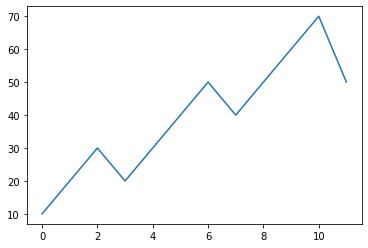

In [38]:
s = Series([10, 20, 30, 20, 30, 40, 50, 40, 50, 60, 70, 50])
s.plot.line()    # create a line plot from our series (because of "inline", show it in the browser)

<AxesSubplot:title={'center':'My amazing plot'}>

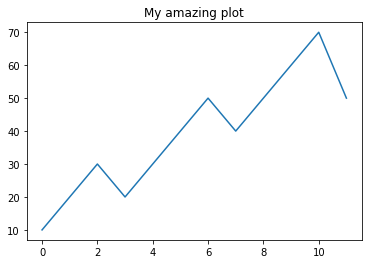

In [39]:
# customize this plot

s.plot.line(title='My amazing plot')

<AxesSubplot:title={'center':'My amazing plot'}>

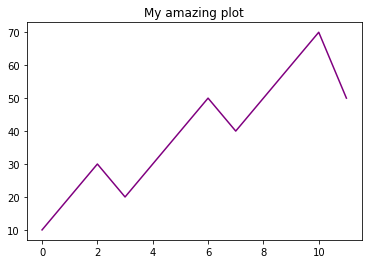

In [40]:
s.plot.line(title='My amazing plot', color='purple')

<AxesSubplot:title={'center':'My amazing plot'}>

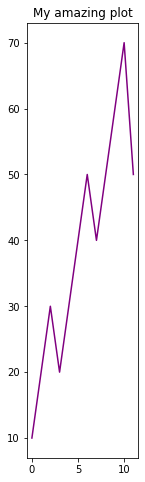

In [44]:
#                                                          (width,height)
s.plot.line(title='My amazing plot', color='purple', figsize=(2,8)) # figsize takes (inches, inches)

<AxesSubplot:>

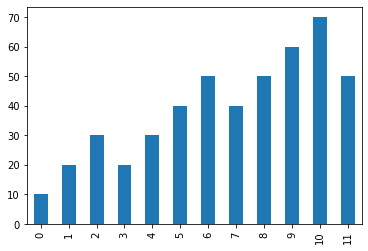

In [45]:
# bar plot!
s.plot.bar()

<AxesSubplot:>

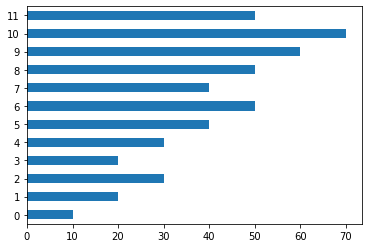

In [46]:
s.plot.barh()

<AxesSubplot:>

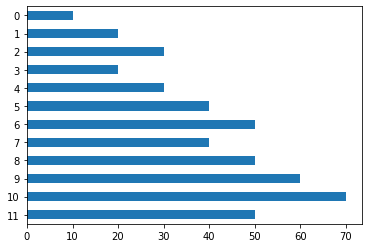

In [47]:
s.sort_index(ascending=False).plot.barh()

<AxesSubplot:ylabel='Frequency'>

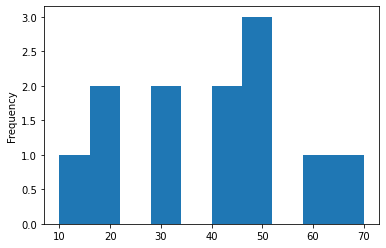

In [48]:
# histogram -- divide our data into 10 buckets. plot the size (height) of each bucket,
# with the height representing how many there were

s.plot.hist()

In [49]:
s

0     10
1     20
2     30
3     20
4     30
5     40
6     50
7     40
8     50
9     60
10    70
11    50
dtype: int64

In [50]:
s.value_counts()

50    3
20    2
30    2
40    2
10    1
60    1
70    1
dtype: int64

In [51]:
# descriptive statistics -- John Tewkey
s.describe()

count    12.000000
mean     39.166667
std      17.816404
min      10.000000
25%      27.500000
50%      40.000000
75%      50.000000
max      70.000000
dtype: float64

<AxesSubplot:>

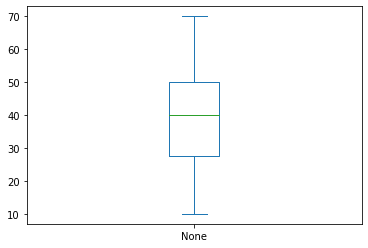

In [52]:
# we can get a visual version of describe, with "box and whiskers plots"

s.plot.box()

<AxesSubplot:ylabel='None'>

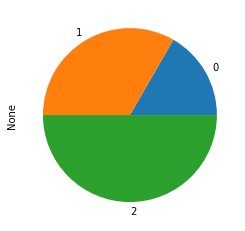

In [53]:
s = Series([10, 20, 30])

s.plot.pie()   # total the values, show what proportion each element contributed to the total

In [54]:
# it's common to create a pie plot based on the output from value_counts
# meaning: call value_counts, which gives you a series, showing how often each value was there
# turn that series into a pie plot.

# Exercise: Weather plotting

1. Get the weather report for your city over the coming 10 days, and create a series with the high temperatures. This index should contain the dates ('YYMMDD').
2. Create a line plot for the temperatures. 
3. Create a pie plot, showing how often each temperature appears in the 10-day forecast. 
4. Create a box plot with the temperatures. What are the minimum, maximum, and median (50%) temperatures? Compare this with the call to "describe" -- which makes more sense to you?

In [55]:
s = Series([18, 17, 15, 16, 17, 18, 15, 14, 14, 13],
          index='1214 1215 1216 1217 1218 1219 1220 1221 1222 1223'.split())
s

1214    18
1215    17
1216    15
1217    16
1218    17
1219    18
1220    15
1221    14
1222    14
1223    13
dtype: int64

<AxesSubplot:>

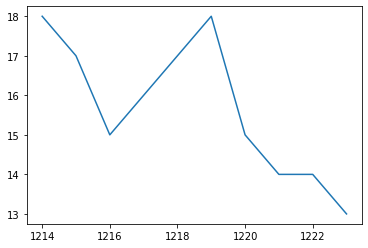

In [56]:
s.plot.line()

<AxesSubplot:ylabel='None'>

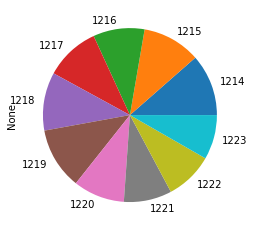

In [57]:
# let's total the temperatures for the next 10 days, then show
# how much of that total belongs to each day.

s.plot.pie()

<AxesSubplot:ylabel='None'>

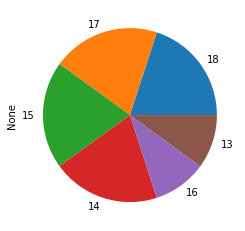

In [59]:
s.value_counts().plot.pie()

In [60]:
s.describe()

count    10.000000
mean     15.700000
std       1.766981
min      13.000000
25%      14.250000
50%      15.500000
75%      17.000000
max      18.000000
dtype: float64

<AxesSubplot:>

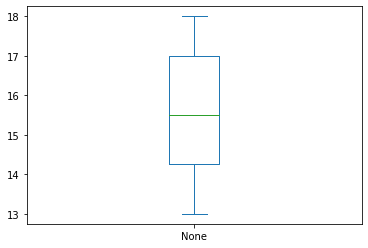

In [61]:
s.plot.box()

In [62]:
# sometimes, box plots can get weird
s

1214    18
1215    17
1216    15
1217    16
1218    17
1219    18
1220    15
1221    14
1222    14
1223    13
dtype: int64

In [63]:
s.loc['1219'] = 30
s

1214    18
1215    17
1216    15
1217    16
1218    17
1219    30
1220    15
1221    14
1222    14
1223    13
dtype: int64

<AxesSubplot:>

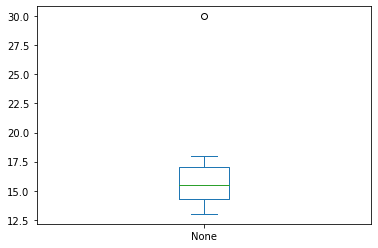

In [64]:
s.plot.box()

In [65]:
s.describe()

count    10.000000
mean     16.900000
std       4.863698
min      13.000000
25%      14.250000
50%      15.500000
75%      17.000000
max      30.000000
dtype: float64

In [67]:
(17 - 14.25) * 2

5.5

# Data frames!

A data frame is a 2D data structure. It has columns and rows. The columns have names, and the rows have the index (which can be names). Overall, we can think of a data frame as a bunch of columns, each of which is a series object. So the dtypes will mostly be in columns, not in rows.

In [70]:
# creating a data frame

# list of lists!
df = DataFrame([[10, 20, 30, 40],
               [50, 60, 70, 80],
               [90, 100, 110, 120],
               [130, 140, 150, 160]],
              index=list('wxyz'),
              columns=list('abcd'))
df

,a,b,c,d
w,10,20,30,40
x,50,60,70,80
y,90,100,110,120
z,130,140,150,160


In [71]:
# the above data frame has 4 rows (identified by the index, w/x/y/z, aka df.index)
df.index

Index(['w', 'x', 'y', 'z'], dtype='object')

In [72]:
# we can get the columns names via "columns"
df.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [74]:
# creating a data frame

# list of lists!
np.random.seed(0)
df = DataFrame(np.random.randint(0, 100, [4,4]),
               index=list('wxyz'),
              columns=list('abcd'))
df

,a,b,c,d
w,44,47,64,67
x,67,9,83,21
y,36,87,70,88
z,88,12,58,65


In [75]:
# how can I retrieve from my data frame?

# from the index, it's *JUST LIKE* a series -- make sure to use .loc and .iloc, though
df.loc['x']

a    67
b     9
c    83
d    21
Name: x, dtype: int64

In [76]:
# fancy indexing to retrieve more than one
df.loc[['w', 'z']]

,a,b,c,d
w,44,47,64,67
z,88,12,58,65


In [77]:
df.iloc[[0, 3]]   # fancy indexing based on position

,a,b,c,d
w,44,47,64,67
z,88,12,58,65


In [78]:
# retrieve a column with []
df['a']

w    44
x    67
y    36
z    88
Name: a, dtype: int64

In [79]:
df[['a', 'c']]

,a,c
w,44,64
x,67,83
y,36,70
z,88,58


In [80]:
# what if I want to combine these?
# I want row w, column c

# I can use .loc, and pass it a second argument in the []
df.loc['w', 'c']

64

In [81]:
df.loc[['w', 'z'], 'c']

w    64
z    58
Name: c, dtype: int64

In [82]:
#         rows      columns
df.loc[['w', 'z'], ['b', 'd']]

,b,d
w,47,67
z,12,65


In [83]:
# can I use this syntax to retrieve things?
df.loc['w']['c']

64

In [84]:
# let's assign a value back to the data frame
df.loc['w']['c'] = 99

In [85]:
df

,a,b,c,d
w,44,47,99,67
x,67,9,83,21
y,36,87,70,88
z,88,12,58,65


In [87]:
# don't do this!
# the reason is: You will (at some point) get a warning.
# the warning will say that your assignment might not have actually worked

# if we assign to ['y']['b'], we might be assigning back to df
# but we also might be assigning to the interim data structure that 
# was created when we did our query

df.loc['y']['b'] = 100

In [88]:
# the right way to assign to a data frame is with .loc and *ONE* set of square brackets
df.loc['y', 'b'] = 200

# Exercise: Data frames

1. Create a 5x5 data frame in which the rows are `abcde` and the columns are `vwxyz`. The values should be random integers from 0-1,000.
2. Retrieve row `b`.
3. Retrieve rows `b` and `d`.
4. Retrieve rows `b`, `c`, and `d`.
5. Retrieve column `w`
6. Retieve columns `w` and `y`.
7. Retrieve columns, `w`, `x`, and `y`.
8. Retrieve the item at index `e`, column `v`.
9. Update the item at index `e`, column `v`, to be 123.456.

In [90]:
np.random.seed(0)
df = DataFrame(np.random.randint(0, 1000, [5,5]),
              index=list('abcde'),
              columns=list('vwxyz'))
df

,v,w,x,y,z
a,684,559,629,192,835
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,314,705
e,486,551,87,174,600


In [91]:
# retrieve row b
df.loc['b']

v    763
w    707
x    359
y      9
z    723
Name: b, dtype: int64

In [92]:
df.iloc[1]

v    763
w    707
x    359
y      9
z    723
Name: b, dtype: int64

In [93]:
# retrieve b and d
# fancy indexing
df.loc[['b', 'd']]

,v,w,x,y,z
b,763,707,359,9,723
d,472,600,396,314,705


In [94]:
# fancy indexing, but with positional numbers
df.iloc[[1,3]]

,v,w,x,y,z
b,763,707,359,9,723
d,472,600,396,314,705


In [96]:
# we could use a slice with .loc
# in Pandas, using .loc, with a non-numeric index, slices are up to AND INCLUDING
df.loc['b':'d':2]

,v,w,x,y,z
b,763,707,359,9,723
d,472,600,396,314,705


In [98]:
# slices on numeric ranges are up to AND NOT INCLUDING
df.iloc[1:4:2]

,v,w,x,y,z
b,763,707,359,9,723
d,472,600,396,314,705


In [100]:
# slices on a data frame, handed to [], do *NOT* go to the columns.
# they retrieve based on the rows/index.

df['b':'d':2]

,v,w,x,y,z
b,763,707,359,9,723
d,472,600,396,314,705


In [101]:
# what about b, c, and d?
df['b':'d']

,v,w,x,y,z
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,314,705


In [102]:
df.loc['b':'d']

,v,w,x,y,z
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,314,705


In [103]:
df.loc[['b', 'c', 'd']]

,v,w,x,y,z
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,314,705


In [104]:
df.iloc[1:4]

,v,w,x,y,z
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,314,705


In [105]:
df

,v,w,x,y,z
a,684,559,629,192,835
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,314,705
e,486,551,87,174,600


In [106]:
# retrieve column w

df['w']

a    559
b    707
c    754
d    600
e    551
Name: w, dtype: int64

In [107]:
# you can also use an attribute syntax
df.w

a    559
b    707
c    754
d    600
e    551
Name: w, dtype: int64

In [108]:
# columns 'w' and 'y'
df[['w', 'y']]

,w,y
a,559,192
b,707,9
c,754,599
d,600,314
e,551,174


In [109]:
# can I use a slice to retrieve 'w' and 'y'?
# this doesn't do what we want, because it's looking for *ROWS* 'w' through 'y'
# there's no good answer to this
df['w':'y']

,v,w,x,y,z


In [112]:
# don't do this, but you could...
df[df.columns[1:4:2]]

,w,y
a,559,192
b,707,9
c,754,599
d,600,314
e,551,174


In [113]:
# columns  w, x, and y

df[['w', 'x', 'y']]

,w,x,y
a,559,629,192
b,707,359,9
c,754,804,599
d,600,396,314
e,551,87,174


In [114]:
# get row e, column v

df.loc['e', 'v']

486

In [115]:
# Update the item at e, v to be 123.456

df.loc['e', 'v'] = 123.456

In [117]:
# we see here that when we assign a value to a column, and the column's
# previous dtype could not accommodate that value, the dtype changes!

df

,v,w,x,y,z
a,684.000,559,629,192,835
b,763.000,707,359,9,723
c,277.000,754,804,599,70
d,472.000,600,396,314,705
e,123.456,551,87,174,600


In [120]:
s = Series([10, 20, 30, 40, 50], dtype=np.int32)
s

0    10
1    20
2    30
3    40
4    50
dtype: int32

In [121]:
s.loc[3] = 12.34
s

0    10.00
1    20.00
2    30.00
3    12.34
4    50.00
dtype: float64

In [124]:
df = DataFrame([[1,0.1, 11],
              [5, 0.5, 15],
              [4, 0.4, 14]],
              columns=list('xyz'))
df

,x,y,z
0,1,0.1,11
1,5,0.5,15
2,4,0.4,14


In [125]:
df['x'][1] = 100

/var/folders/rr/0mnyyv811fs5vyp22gf4fxk00000gn/T/ipykernel_4223/2147447848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'][1] = 100


In [126]:
df

,x,y,z
0,1,0.1,11
1,100,0.5,15
2,4,0.4,14


In [ ]:
# always assign with .loc[ROW_SELECT, COLUMN_SELECT]



In [127]:
np.random.seed(0)
df = DataFrame(np.random.randint(0, 1000, [5,5]),
              index=list('abcde'),
              columns=list('vwxyz'))
df

,v,w,x,y,z
a,684,559,629,192,835
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,314,705
e,486,551,87,174,600


In [128]:
df.loc['c', 'y'] = 999
df

,v,w,x,y,z
a,684,559,629,192,835
b,763,707,359,9,723
c,277,754,804,999,70
d,472,600,396,314,705
e,486,551,87,174,600


In [129]:
df.loc[['a', 'b'], ['x', 'y']]

,x,y
a,629,192
b,359,9


In [130]:
# assign multiple elements with .loc on the left
df.loc[['a', 'b'], ['x', 'y']] = 888

In [131]:
df

,v,w,x,y,z
a,684,559,888,888,835
b,763,707,888,888,723
c,277,754,804,999,70
d,472,600,396,314,705
e,486,551,87,174,600


# Next up

1. Boolean indexes and data frames
2. Adding/removing columns and rows
3. Setting and resetting indexes
4. Cleaning data, including `NaN`

Resume at :50

In [132]:
df

,v,w,x,y,z
a,684,559,888,888,835
b,763,707,888,888,723
c,277,754,804,999,70
d,472,600,396,314,705
e,486,551,87,174,600


In [134]:
# create a boolean series based on df['z']
# which elements of df['z'] are > mean?

df['z'][df['z'] > df['z'].mean()]

a    835
b    723
d    705
e    600
Name: z, dtype: int64

In [135]:
# what if I want all of the elements of column y where z is greater than the mean?
df['y'][df['z'] > df['z'].mean()]

a    888
b    888
d    314
e    174
Name: y, dtype: int64

In [136]:
# what if I want all of the rows of df where z is greater than the mean?
df[df['z'] > df['z'].mean()]

,v,w,x,y,z
a,684,559,888,888,835
b,763,707,888,888,723
d,472,600,396,314,705
e,486,551,87,174,600


In [137]:
df['z'].mean()

586.6

In [138]:
df.mean()  # get a value for each column

v    536.4
w    634.2
x    612.6
y    652.6
z    586.6
dtype: float64

In [139]:
df.std()

v    191.774086
w     91.376693
x    357.594463
y    378.987863
z    300.574949
dtype: float64

In [140]:
df.describe()  # gives me descriptive statistics for each column

,v,w,x,y,z
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,536.400000,634.200000,612.600000,652.600000,586.600000
std,191.774086,91.376693,357.594463,378.987863,300.574949
min,277.000000,551.000000,87.000000,174.000000,70.000000
25%,472.000000,559.000000,396.000000,314.000000,600.000000
50%,486.000000,600.000000,804.000000,888.000000,705.000000
75%,684.000000,707.000000,888.000000,888.000000,723.000000
max,763.000000,754.000000,888.000000,999.000000,835.000000


In [142]:
# find where elements of df['w'] are even

# find all rows in df (the data frame) where df['w'] is even
df[df['w'] % 2 == 0]

,v,w,x,y,z
c,277,754,804,999,70
d,472,600,396,314,705


In [145]:
# apply an operator to the entire data frame, not just a column

df % 2 == 0  # boolean data frame

,v,w,x,y,z
a,True,False,True,True,False
b,False,False,True,True,False
c,False,True,True,False,True
d,True,True,True,True,False
e,True,False,False,True,True


In [146]:
# apply our boolean data frame as a make index on df (the entire data frame)

# the result: where the boolean is True, we get the value... otherwise, we get NaN
df[df % 2 == 0]

,v,w,x,y,z
a,684.0,NaN,888.0,888.0,NaN
b,NaN,NaN,888.0,888.0,NaN
c,NaN,754.0,804.0,NaN,70.0
d,472.0,600.0,396.0,314.0,NaN
e,486.0,NaN,NaN,174.0,600.0


In [147]:
df

,v,w,x,y,z
a,684,559,888,888,835
b,763,707,888,888,723
c,277,754,804,999,70
d,472,600,396,314,705
e,486,551,87,174,600


In [148]:
# df.loc[ROW_SELECT, COLUMN_SELECT]

# this is a boolean series, which I can use to select rows
df['w'] % 2 == 0

a    False
b    False
c     True
d     True
e    False
Name: w, dtype: bool

In [151]:
#       row select      list of columns
df.loc[df['w']%2==0,  ['x', 'y']]

,x,y
c,804,999
d,396,314


# Exercise: Retrieval and setting with boolean indexes

1. Create a 5x5 data frame with ints from 0-1,000, index `abcde` and columns `vwxyz`.
2. Which elements of `w` are both even and greater than the mean?
3. Which elements of `v` and `x` correspond to what you found in (2)?
4. Replace the item at `d`, `y` with the mean of column `y`.

In [152]:
np.random.seed(0)
df = DataFrame(np.random.randint(0, 1000, [5,5]),
              index=list('abcde'),
              columns=list('vwxyz'))
df

,v,w,x,y,z
a,684,559,629,192,835
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,314,705
e,486,551,87,174,600


In [156]:
# which elements of w are even + greater than the mean?
df['w'][(df['w']%2==0) &             # where is w even?
        (df['w']>df['w'].mean())]    # where is w > w's mean?

c    754
Name: w, dtype: int64

In [157]:
# my traditional way to do it
df[['v', 'x']][(df['w']%2==0) &             # where is w even?
               (df['w']>df['w'].mean())]    # where is w > w's mean?

,v,x
c,277,804


In [158]:
# my current preferred method
df.loc[(df['w']%2==0) &             
       (df['w']>df['w'].mean()), ['v', 'x']]    

,v,x
c,277,804


In [163]:
# don't do this!
df.loc['d']['y'] = df['y'].mean()

In [164]:
df

,v,w,x,y,z
a,684,559,629,192,835
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,246,705
e,486,551,87,174,600


In [162]:
df['y'].mean()

246.2

In [168]:
# instead, remove the ][ brackets
df.loc['d', 'y'] = df['y'].mean()

In [169]:
df

,v,w,x,y,z
a,684,559,629,192.0,835
b,763,707,359,9.0,723
c,277,754,804,599.0,70
d,472,600,396,243.6,705
e,486,551,87,174.0,600


In [167]:
df['y'].mean()

243.6

In [170]:
# adding and removing rows
# adding and removing columns

df

,v,w,x,y,z
a,684,559,629,192.0,835
b,763,707,359,9.0,723
c,277,754,804,599.0,70
d,472,600,396,243.6,705
e,486,551,87,174.0,600


In [171]:
# add a row by assigning to .loc with that row
# the value needs to be an iterable of the right length

df.loc['f'] = [10, 20, 30, 40, 50]
df

,v,w,x,y,z
a,684,559,629,192.0,835
b,763,707,359,9.0,723
c,277,754,804,599.0,70
d,472,600,396,243.6,705
e,486,551,87,174.0,600
f,10,20,30,40.0,50


In [172]:
# how do we know that the columns have the dtypes?

df.dtypes

v      int64
w      int64
x      int64
y    float64
z      int64
dtype: object

In [173]:
# how can I add a column?
# answer: assign to a column that doesn't yet exist, and make sure the value is
# an iterable of the right length

df['u'] = [100, 200, 300, 400, 500, 600]
df

,v,w,x,y,z,u
a,684,559,629,192.0,835,100
b,763,707,359,9.0,723,200
c,277,754,804,599.0,70,300
d,472,600,396,243.6,705,400
e,486,551,87,174.0,600,500
f,10,20,30,40.0,50,600


In [174]:
# replace a column -- for example, after changing its type
df['u'] = df['u'].astype(np.float64)
df

,v,w,x,y,z,u
a,684,559,629,192.0,835,100.0
b,763,707,359,9.0,723,200.0
c,277,754,804,599.0,70,300.0
d,472,600,396,243.6,705,400.0
e,486,551,87,174.0,600,500.0
f,10,20,30,40.0,50,600.0


In [175]:
# sometimes, we have to remove rows and columns

# how do I remove a row?
# use the df.drop method, naming a row (a string) or a list of rows (list of strings)
# drop doesn't change df, but rather returns a new data frame based on df.
df.drop('f')

,v,w,x,y,z,u
a,684,559,629,192.0,835,100.0
b,763,707,359,9.0,723,200.0
c,277,754,804,599.0,70,300.0
d,472,600,396,243.6,705,400.0
e,486,551,87,174.0,600,500.0


In [176]:
df

,v,w,x,y,z,u
a,684,559,629,192.0,835,100.0
b,763,707,359,9.0,723,200.0
c,277,754,804,599.0,70,300.0
d,472,600,396,243.6,705,400.0
e,486,551,87,174.0,600,500.0
f,10,20,30,40.0,50,600.0


In [177]:
# the real way to remove df['f'] is to assign the result of drop back to df
df = df.drop('f')
df

,v,w,x,y,z,u
a,684,559,629,192.0,835,100.0
b,763,707,359,9.0,723,200.0
c,277,754,804,599.0,70,300.0
d,472,600,396,243.6,705,400.0
e,486,551,87,174.0,600,500.0


In [178]:
# how do we drop a column?
# we use df.drop also!
# we must specify the axis when doing this!
# axis=1 == columns, axis=0 == rows (default)
# or.... say axis='columns' or axis='rows'
df.drop('u', axis=1)

,v,w,x,y,z
a,684,559,629,192.0,835
b,763,707,359,9.0,723
c,277,754,804,599.0,70
d,472,600,396,243.6,705
e,486,551,87,174.0,600


In [179]:
df = df.drop('u', axis='columns')
df

,v,w,x,y,z
a,684,559,629,192.0,835
b,763,707,359,9.0,723
c,277,754,804,599.0,70
d,472,600,396,243.6,705
e,486,551,87,174.0,600


In [186]:
# (1) identifying outliers  (we'll define this to be <mean-std or >mean+std)
# let's start with column v

# remove outliers from column v
df.loc[(df['v'] < df['v'].mean() + df['v'].std()) & 
       (df['v'] > df['v'].mean() - df['v'].std()), 'v']



a    684
d    472
e    486
Name: v, dtype: int64

In [187]:
# (2) removing all rows from df where v is an outlier

df.loc[(df['v'] < df['v'].mean() + df['v'].std()) & 
       (df['v'] > df['v'].mean() - df['v'].std())]

,v,w,x,y,z
a,684,559,629,192.0,835
d,472,600,396,243.6,705
e,486,551,87,174.0,600


# Exercise: Product prices + taxes

1. Create a data frame containing five rows. Each row describes a product. One column will be the name of the product, and another column will be the price of the product.  A third will be the quantity sold.
2. Which product had the greatest number of sales?  
3. Which product had the greatest value of sales?  Add a new column that'll reflect income from this product.
4. How much did we make, total, from all products?
5. Due to a tax change, we need to increase the price of each item by 10%. Change the prices to reflect this.  This means that sales will go down by 10%.  Change the quantity to reflect this.  Recalculate how much the store will make, and print that.

In [189]:
df = DataFrame([['apple', 2, 10],
                ['banana', 1.5, 20],
                ['cucumber', 1, 12],
                ['dill', 0.5, 15],
                ['cellphone', 10, 100]],
              columns=['product', 'price', 'qty_sold'])
df
                

,product,price,qty_sold
0,apple,2.0,10
1,banana,1.5,20
2,cucumber,1.0,12
3,dill,0.5,15
4,cellphone,10.0,100


In [193]:
# which product sold the most?
df.loc[df['qty_sold'] == df['qty_sold'].max(), 'product']

4    cellphone
Name: product, dtype: object

In [195]:
# which product had the greatest value of sales?
# add a new column, income, per product

df['income'] = df['price'] * df['qty_sold']
df

,product,price,qty_sold,income
0,apple,2.0,10,20.0
1,banana,1.5,20,30.0
2,cucumber,1.0,12,12.0
3,dill,0.5,15,7.5
4,cellphone,10.0,100,1000.0


In [197]:
df.loc[df['income'] == df['income'].max(), 'product']

4    cellphone
Name: product, dtype: object

In [198]:
# how much did we make from all products?
# we can just our new column, 'income', and sum it
df['income'].sum()

1069.5

In [200]:
# what if we didn't have the "income" column?
(df['price'] * df['qty_sold']).sum()

1069.5

In [201]:
# increase the price of each item by 10%
# decrease qty_sold by 10%
# recalculate income

df['price'] = df['price'] * 1.1
df['qty_sold'] = df['qty_sold'] * 0.9
df['income'] = df['price'] * df['qty_sold']
df['income'].sum()

1058.805

In [202]:
df

,product,price,qty_sold,income
0,apple,2.20,9.0,19.800
1,banana,1.65,18.0,29.700
2,cucumber,1.10,10.8,11.880
3,dill,0.55,13.5,7.425
4,cellphone,11.00,90.0,990.000


In [203]:
!ls

'Cisco - 2021-12Dec-13-datascience.html'    celebrity_deaths_2016.csv
'Cisco - 2021-12Dec-13-datascience.ipynb'   cisco-2021-12Dec-14.zip
 Cisco-2021-12Dec-14.ipynb		    data-science-exercise-files.zip
 airlines.dat				    languages.csv
 airports				    taxi.csv
 airports.zip				    titanic3.csv
 burrito_current.csv


# Working with files

Pandas knows how to work with a *huge* number of file formats. But the two that are most common are CSV and Excel. CSV is "comma-separated values," meaning that each record is on one line of the file, and fields are separated by commas. I actually like tab-separated values, because it's rarer to have tabs in your data, so you don't need "" around fields.

In [204]:
# exporting data
# If I want to export my data frame, df, to another format, I can do this:

df.to_clipboard()

In [211]:
# we can export to csv with to_csv(filename)
# let's separate with tab!
df.to_csv('mydata.csv', sep='\t')

In [212]:
!cat mydata.csv

	product	price	qty_sold	income
0	apple	2.2	9.0	19.8
1	banana	1.6500000000000001	18.0	29.700000000000003
2	cucumber	1.1	10.8	11.880000000000003
3	dill	0.55	13.5	7.425000000000001
4	cellphone	11.0	90.0	990.0


In [210]:
help(df.to_csv)

Help on method to_csv in module pandas.core.generic:

to_csv(path_or_buf: 'FilePathOrBuffer[AnyStr] | None' = None, sep: 'str' = ',', na_rep: 'str' = '', float_format: 'str | None' = None, columns: 'Sequence[Hashable] | None' = None, header: 'bool_t | list[str]' = True, index: 'bool_t' = True, index_label: 'IndexLabel | None' = None, mode: 'str' = 'w', encoding: 'str | None' = None, compression: 'CompressionOptions' = 'infer', quoting: 'int | None' = None, quotechar: 'str' = '"', line_terminator: 'str | None' = None, chunksize: 'int | None' = None, date_format: 'str | None' = None, doublequote: 'bool_t' = True, escapechar: 'str | None' = None, decimal: 'str' = '.', errors: 'str' = 'strict', storage_options: 'StorageOptions' = None) -> 'str | None' method of pandas.core.frame.DataFrame instance
    Write object to a comma-separated values (csv) file.
    
    Parameters
    ----------
    path_or_buf : str or file handle, default None
        File path or object, if None is provided the

In [214]:
# read our CSV file 
# we don't want to populate/replace an existing data frame with CSV.
# we want to create a *new* data frame.

new_df = pd.read_csv('mydata.csv', sep='\t')
new_df


,Unnamed: 0,product,price,qty_sold,income
0,0,apple,2.20,9.0,19.800
1,1,banana,1.65,18.0,29.700
2,2,cucumber,1.10,10.8,11.880
3,3,dill,0.55,13.5,7.425
4,4,cellphone,11.00,90.0,990.000


In [215]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_me

In [216]:
# set the index column
new_df = pd.read_csv('mydata.csv', sep='\t',
                    index_col='Unnamed: 0')
new_df

,product,price,qty_sold,income
0,apple,2.20,9.0,19.800
1,banana,1.65,18.0,29.700
2,cucumber,1.10,10.8,11.880
3,dill,0.55,13.5,7.425
4,cellphone,11.00,90.0,990.000


In [217]:
# choose some columns (but not others)
new_df = pd.read_csv('mydata.csv', sep='\t',
                    usecols=['Unnamed: 0', 'product', 'income'],
                    index_col='Unnamed: 0')
new_df

,product,income
0,apple,19.800
1,banana,29.700
2,cucumber,11.880
3,dill,7.425
4,cellphone,990.000


In [218]:
!ls *.csv

burrito_current.csv	   languages.csv  taxi.csv
celebrity_deaths_2016.csv  mydata.csv	  titanic3.csv


In [220]:
df = pd.read_csv('taxi.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


# Exercise: Taxi data

1. Load data from `taxi.csv` into a data frame. We're only interested in three columns: `passenger_count`, `trip_distance`, and `total_amount`.
2. What was the most common number of passengers in a taxi ride?  What was the least common?
3. Were there any trips that went <= 0 miles? If so, how much did people pay for those trips, on average?
4. Were there any trips that cost <= 0 dollars? If so, how far did people go on those trips?


In [221]:
df.shape

(9999, 19)

In [222]:
df = pd.read_csv('taxi.csv', 
                usecols=['passenger_count', 'trip_distance', 'total_amount'])
df

,passenger_count,trip_distance,total_amount
0,1,1.63,17.80
1,1,0.46,8.30
2,1,0.87,11.00
3,1,2.13,17.16
4,1,1.40,10.30
...,...,...,...
9994,1,2.70,12.30
9995,1,4.50,20.30
9996,1,5.59,22.30
9997,6,1.54,7.80


In [223]:
# most (and least) common number of passengers
df['passenger_count'].value_counts()

1    7207
2    1313
5     520
3     406
6     369
4     182
0       2
Name: passenger_count, dtype: int64

In [230]:
# were there any trips that went <= 0 miles?  How much did people pay for those trips?

df.loc[df['trip_distance'] <= 0, 'total_amount'].mean()

31.581940298507465

In [233]:
df[df['trip_distance'] <= 0].mean()


passenger_count     1.686567
trip_distance       0.000000
total_amount       31.581940
dtype: float64

In [237]:
# were there any trips that cost <= 0 dollars?  How far did they go, on average?

df.loc[df['total_amount'] <= 0, 'trip_distance'].mean()

0.6066666666666667

In [238]:
df.loc[df['total_amount'] <= 0, 'total_amount'].mean()

-6.133333333333333